In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns  

In [2]:
data=pd.read_csv("C:\\Users\\sridhar\\Desktop\\DS2\\ML course kaggle\\9 Time series\\wiki_machine_learning.csv", sep = ' ')

In [3]:
data.tail()

,date,count,lang,page,rank,month,title
382,2016-01-16,1644,en,Machine_learning,8708,201601,Machine_learning
381,2016-01-17,1836,en,Machine_learning,8708,201601,Machine_learning
376,2016-01-18,2983,en,Machine_learning,8708,201601,Machine_learning
375,2016-01-19,3389,en,Machine_learning,8708,201601,Machine_learning
372,2016-01-20,3559,en,Machine_learning,8708,201601,Machine_learning


In [4]:
data.shape

(384, 7)

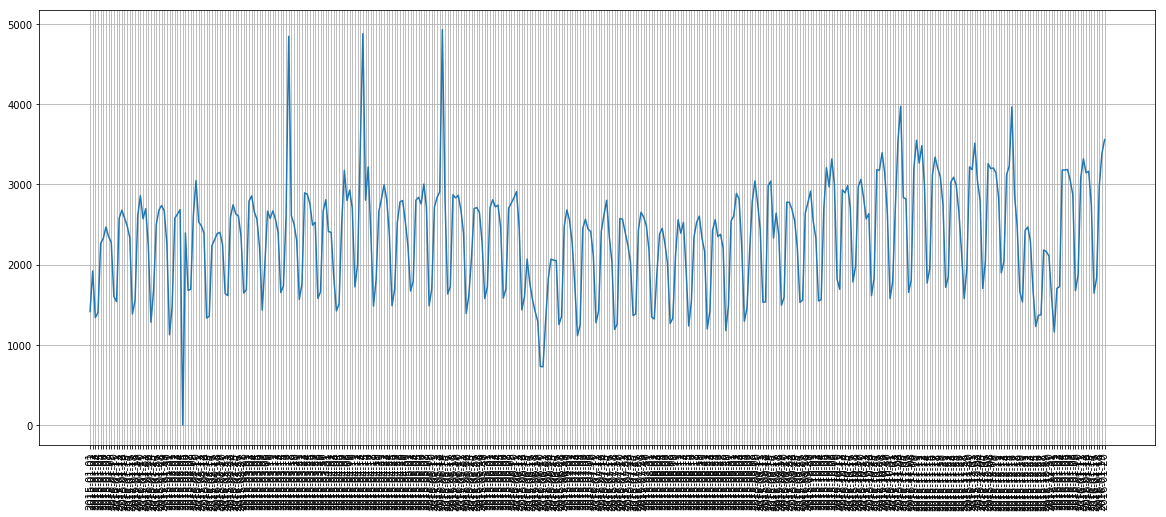

In [5]:
plt.figure(figsize=(20, 8))
plt.plot(data['date'],data['count'])
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [5]:
from scipy import stats
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (15, 10)

Let's verify the stationarity of the series using the Dickey-Fuller test. Is the series stationary? What is the p-value?



In [7]:
sm.tsa.stattools.adfuller(data["count"])

(-3.299737171158712,
 0.014890227037348087,
 15,
 368,
 {'1%': -3.4482453822848496,
  '5%': -2.8694261442901396,
  '10%': -2.5709711770439507},
 5416.814821320779)

In [8]:
# Series is stationary and the  p-value is 0.015

Next, we turn to the construction of the SARIMAX model (sm.tsa.statespace.SARIMAX).

What parameters are the best for the model according to the AIC criterion?

    D = 1, d = 0, Q = 0, q = 2, P = 3, p = 1
    D = 2, d = 1, Q = 1, q = 2, P = 3, p = 1
    D = 1, d = 1, Q = 1, q = 2, P = 3, p = 1
    D = 0, d = 0, Q = 0, q = 2, P = 3, p = 1



In [18]:
model=sm.tsa.statespace.SARIMAX(data['count'],order=(1,0,2), seasonal_order=(3,1,0,12), enforce_stationarity=False).fit()

C:\Users\sridhar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [20]:
model2=sm.tsa.statespace.SARIMAX(data['count'],order=(1,1,2), seasonal_order=(3,2,1,12), enforce_invertibility=False).fit()

C:\Users\sridhar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sridhar\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [16]:
model3=sm.tsa.statespace.SARIMAX(data['count'],order=(1,1,2), seasonal_order=(3,1,1,12),enforce_invertibility=False,enforce_stationarity=False).fit()

C:\Users\sridhar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [15]:
model4=sm.tsa.statespace.SARIMAX(data['count'],order=(1,0,2), seasonal_order=(3,0,0,12),enforce_stationarity=False).fit()

C:\Users\sridhar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [21]:
model.aic

5137.905109217349

In [22]:
model2.aic

5668.494321897253

In [23]:
model3.aic

5123.538736308532

In [24]:
model4.aic

5324.027567575315

In [40]:
# D = 1, d = 1, Q = 1, q = 2, P = 3, p = 1 parameters are best because AIC is minimum with this combination